In [1]:
import math
import operator
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import enchant
import nltk
from nltk.stem.snowball import SnowballStemmer
# from pybabelfy.babelfy import *
from nltk.wsd import lesk
# from lesk import simple_lesk

In [2]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)

# false_positive = X_test[(y_test == 1) & (y_pred_class == 0)]
# false_negative = X_test[(y_test == 0) & (y_pred_class == 1)]
# print(false_positive)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

    

General Accuracy: 0.912065439673
[[205  33]
 [ 10 241]]


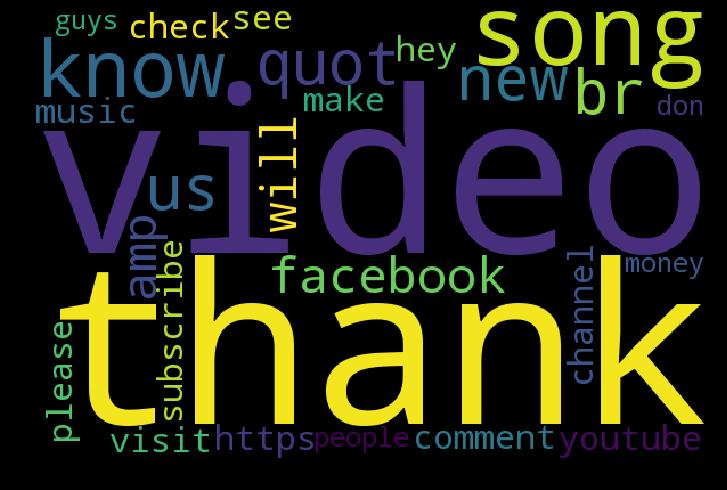

In [3]:
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]

spam_words = tokens.sort_values('spam', ascending=False)
spam_words = list(spam_words.token)[:70]
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [4]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\W*\b\w{1,2}\b', '')
    df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
    df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

# youtube_df['length'] = youtube_df['CONTENT'].apply(len)
# mpl.rcParams['patch.force_edgecolor'] = True
# plt.style.use('seaborn-bright')
# youtube_df.hist(column='length', by='CLASS', bins=50,figsize=(11,5))
# plt.show()

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
# The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
#                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
#                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
stopword.append('You')
stopword.append('I')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_positive)



General Accuracy: 0.907975460123
[[201  37]
 [  8 243]]
False Positive Rate: 3.18725099602
False Negative Rate: 15.5462184874


In [5]:
# Text Expansion Method: 
    # Text Normalization
    # Concept Generation
    # Word Sense Disambiguation 
    # Merging Rule

In [6]:
# filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
# youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
# for name in filename_list:
#     df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(r'[^0-9a-zA-Z]+', ' ')
#     df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
#     df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
#     youtube_df = youtube_df.append(df[1:], ignore_index=True)

    
# X = youtube_df.CONTENT[1:] # not including the headers..
# y = youtube_df.CLASS[1:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# stopword = stopwords.words('english')
# # The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
# #                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
# #                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
# stopword.append('You')
# stopword.append('I')
# vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
# X_train_dtm = vect.fit_transform(X_train) 
# X_test_dtm = vect.transform(X_test)

# nb = MultinomialNB()
# nb.fit(X_train_dtm, y_train)
# y_pred_class = nb.predict(X_test_dtm)  

# print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
# print(confusion_matrix)
# false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
# false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
# print('False Positive Rate:', false_positive_rate*100)
# print('False Negative Rate:', false_negative_rate*100)

# filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
# youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
# for name in filename_list:
#     df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\W*\b\w{1,2}\b', '')
#     df['CONTENT'] = df['CONTENT'].str.replace('\ufeff', '')
#     df['CONTENT'] = df['CONTENT'].str.replace('(', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(':', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(')', '')
#     df['CONTENT'] = df['CONTENT'].str.replace('/>', '')
#     df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
# #     df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
#     youtube_df = youtube_df.append(df[1:], ignore_index=True)

# X = youtube_df.CONTENT[1:] # not including the headers..
# y = youtube_df.CLASS[1:]
# d = enchant.Dict('en_US')
# stemmer = SnowballStemmer("english")

# slang_df = pd.read_csv('word', sep='=>', names=['english_word', 'slang_word'])    
# slang_words = slang_df['slang_word']

# index = 0
# for row in X: 
#     new_row = []
#     index += 1
#     for word  in row:
#         if d.check(word) is True:
# #             stem_word = stemmer.stem(word)
#             new_row.append(word)
# #             new_row.append(stem_word)
#         else:
#             if word in slang_words:
#                 index = slang_df.index.get_loc(word)
#                 english_word = slang_df['english_word'][index]
# #                 stem_word = stemmer.stem(word)
#                 new_row.append(english_word)
# #                 new_row.append(stem_word)
#             else:
#                 new_row.append(word)
#     X.loc[index] = ', '.join(new_row)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# stopword = stopwords.words('english')
# # The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
# #                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
# #                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
# stopword.append('You')
# stopword.append('I')
# vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
# X_train_dtm = vect.fit_transform(X_train) 
# X_test_dtm = vect.transform(X_test)

# nb = MultinomialNB()
# nb.fit(X_train_dtm, y_train)
# y_pred_class = nb.predict(X_test_dtm)  

# print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
# print(confusion_matrix)
# false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
# false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
# print('False Positive Rate:', false_positive_rate*100)
# print('False Negative Rate:', false_negative_rate*100)
    
# spam_token_count = nb.feature_count_[1, :] 
# X_train_tokens = vect.get_feature_names()      
# tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
# tokens['spam'] = tokens.spam + 1
# tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

# false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
# false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_negative)
    

In [7]:
# Using Information Gain

In [8]:
# def gain(data, class_label, target_attr):
#     spam_val_freq = {}
#     ham_val_freq = {}
#     total_val_freq = {}
#     subset_entropy = 0.0

#     # Calculate the frequency of each of the values in the target attribute
#     for i in range(1, len(data)):
#         if class_label[i] == target_attr:
#             y = data[i]
#             y = y.split(',')
#             for word in y:
#                 if word in spam_val_freq:
#                     spam_val_freq[word] += 1
#                 else:
#                     spam_val_freq[word] = 1   
                    
#         if class_label[i] != target_attr:
#             y = data[i]
#             y = y.split(',')
#             for word in y:
#                 if word in ham_val_freq:
#                     ham_val_freq[word] += 1
#                 else:
#                     ham_val_freq[word] = 1 
    
#     for word in spam_val_freq:
#         if word in ham_val_freq:
#             total_val_freq[word] = spam_val_freq[word] + ham_val_freq[word]
#         else:
#             total_val_freq[word] = 1
    
#     prob_ham = len(youtube_df.loc[youtube_df['CLASS'] == '1']) / len(X)
#     prob_spam = len(youtube_df.loc[youtube_df['CLASS'] == '0']) / len(X)
#     total_entropy = -(prob_ham) * math.log(prob_ham, 2) - prob_spam * math.log(prob_spam, 2)

#     # calculation of conditional entropy 
#     entropy_dict = {}
#     for word in spam_val_freq:
#         spam_val_prob = spam_val_freq[word] / total_val_freq[word]
# #         ham_val_prob = ham_val_freq[word] / total_val_freq[word]
#         entropy = -(spam_val_prob)*math.log(spam_val_prob, 2) 
# #         entropy = -(spam_val_prob)*math.log(spam_val_prob, 2) - ham_val_prob*math.log(ham_val_prob, 2)
#         word_entropy = total_entropy - entropy
#         if len(word) > 1:   
# #             regex = re.compile('[^a-zA-Z]')
# #             word = regex.sub('', word)
#             entropy_dict[word] = word_entropy
#     entropy_dict = sorted(entropy_dict.items(), key=operator.itemgetter(1), reverse=True)
#     return entropy_dict[:200]

# entropy_dict = gain(X, y, '1')
# # print(entropy_dict)

# new_li = []
# for i in entropy_dict:
#     i = list(i)
#     i.append('1')
#     new_li.append(i)
# new_df = pd.DataFrame(new_li, columns=['CONTENT', 'ENTROPY', 'CLASS'])
# new_df1 = new_df[['CONTENT', 'CLASS']]
# youtube_df = youtube_df.append(new_df1, ignore_index=True)

# X = youtube_df.CONTENT[1:] # not including the headers..
# y = youtube_df.CLASS[1:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# stopword = stopwords.words('english')
# # The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
# #                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
# #                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
# stopword.append('You')
# stopword.append('I')
# vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
# X_train_dtm = vect.fit_transform(X_train) 
# X_test_dtm = vect.transform(X_test)

# nb = MultinomialNB()
# nb.fit(X_train_dtm, y_train)
# y_pred_class = nb.predict(X_test_dtm)  

# print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
# print(confusion_matrix)
# false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
# false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
# print('False Positive Rate:', false_positive_rate*100)
# print('False Negative Rate:', false_negative_rate*100)

# false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
# false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_negative)


In [39]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
    df['CONTENT'] = df['CONTENT'].str.replace(r'[^0-9a-zA-Z]+', ' ')
    df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
    df['CONTENT'] = df['CONTENT'].apply(lambda x: [word for word in x if len(word) > 2])
    youtube_df = youtube_df.append(df[1:], ignore_index=True)
    df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
    
X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

d = enchant.Dict('en_US')
slang_df = pd.read_csv('word', sep='=>', names=['english_word', 'slang_word'])    
slang_words = slang_df['slang_word']

index = 0
for row in X: 
    new_row = []
    index += 1
    for word  in row:
        if d.check(word) is True:
            new_row.append(word)
        else:
            if word in slang_words:
                index = slang_df.index.get_loc(word)
                english_word = slang_df['english_word'][index]
                new_row.append(english_word)
            else:
                new_row.append(word)
    X.loc[index] = ', '.join(new_row)

big_df = pd.DataFrame({'content': X, 'class_content': y})
big_df = big_df[big_df.content != '']

    
X_train, X_test, y_train, y_test = train_test_split(big_df.content, big_df.class_content, random_state=1)
stopword = ['a', 'an', 'are', 'as', 'at', 'and', 'be', 'by', 'for', 'from', 'had', 
            'has', 'have', 'he', 'how', 'i', 'in', 'is', 'it', 'of', 'on', 'or', 'she', 'so', 'that', 
            'the', 'they', 'this', 'to', 'too', 'was', 'we', 'were', 'what', 'when', 'where', 'who', 
            'whose', 'will', 'with', 'you']

vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)    

ham_token_count = nb.feature_count_[0, :] 
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()      
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count, 'ham':ham_token_count})
tokens['ham'] = tokens.ham + 1
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))
# print(tokens.sort_values('ham', ascending=False))

false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
print(false_negative)
    

/Users/Rahul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


General Accuracy: 0.931958762887
[[198  28]
 [  5 254]]
False Positive Rate: 1.9305019305
False Negative Rate: 12.389380531
431                                        some, classsic
615                         most, popular, video, youtube
1487    out, people, the, would, saw, this, video, jus...
1642                                        ILOVETHISSONG
1285        thumbs, checked, this, video, see, views, got
819                                          just, superr
193                                           good, music
140                                             wonderful
1454                        GANGMAN, STY, DROP, THE, BASS
977     What, with, the, guys, jacket, sleeve, and, sl...
817                                      this, increidebl
346                             Thumbs, you, listen, this
1457    Hello, all, earth, population, the, world, hop...
1305                   been, back, for, quite, while, now
567                         see, all, human, folly, right
824   